In [84]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
df = pd.read_csv("Housing.csv")

# Undesratnading the DATAFRAME

In [86]:
df['price']

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [87]:
df['price'] = df['price'] // 1000
df['price']

0      13300
1      12250
2      12250
3      12215
4      11410
       ...  
540     1820
541     1767
542     1750
543     1750
544     1750
Name: price, Length: 545, dtype: int64


divided all prices with 1000 so reading numbers will be easier

In [88]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [89]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4766.719266,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1870.437725,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1750.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3430.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4340.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5740.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,13300.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


checck null values


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


no missing data

# VISUALING FEATURES

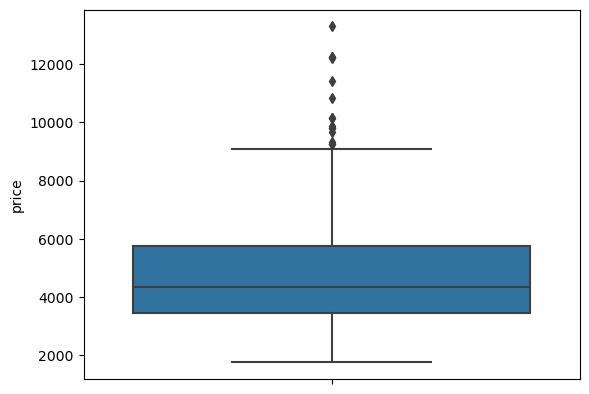

In [91]:
sns.boxplot(data=df, y= "price")
plt.show()

remove outliers later

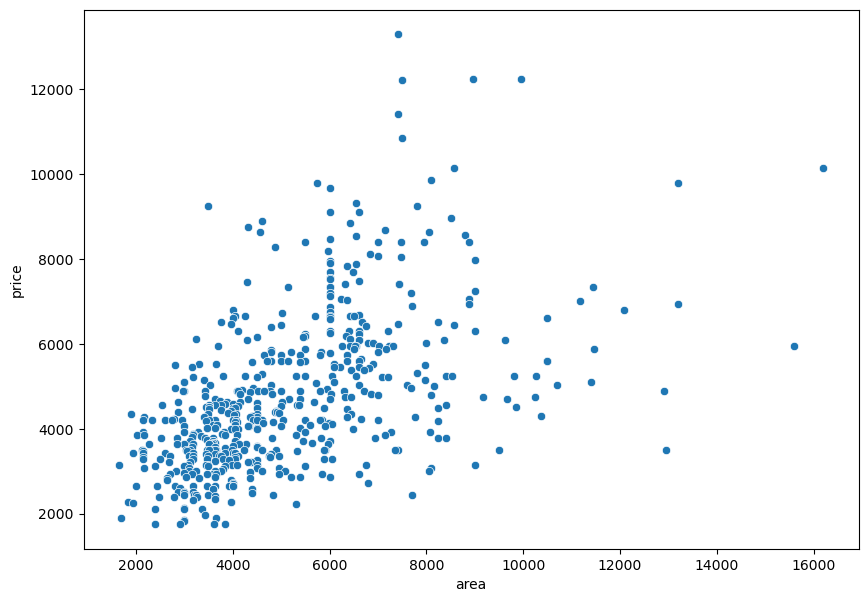

In [92]:
plt.figure(figsize=(10,7))
sns.scatterplot(data= df, x="area", y="price")
plt.show()

a violin plot is a chart that shows the distribution of the data using a combination of a box plot and a density plot. It shows the same information as a box plot but also shows the shape of the distribution of the data using a density curve.

https://datascience.stackexchange.com/questions/28053/boxplots-or-violinplots

https://www.quanthub.com/when-should-you-use-a-violin-plot-instead-of-a-boxplot/

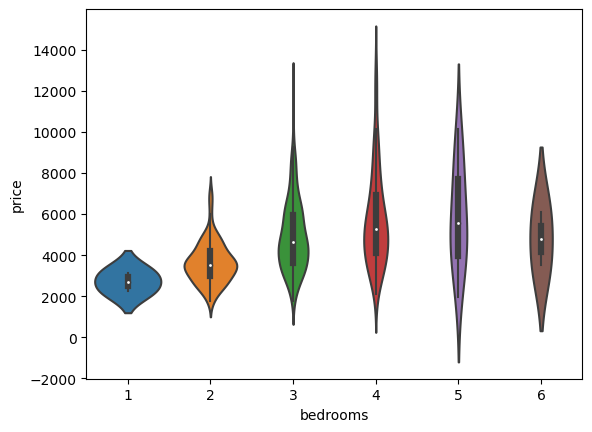

In [93]:
sns.violinplot(data=df, x="bedrooms", y="price")
plt.show()

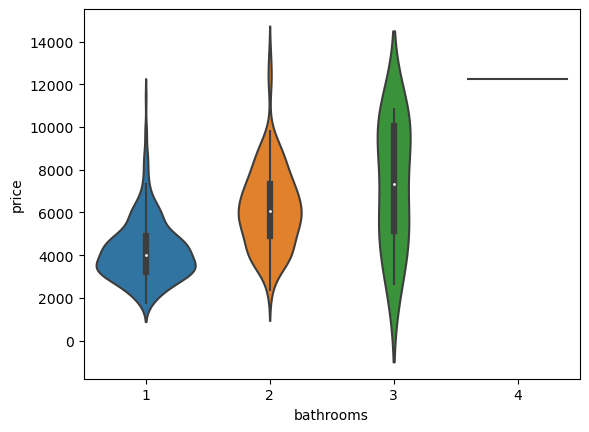

In [94]:
sns.violinplot(data=df, x="bathrooms", y="price")
plt.show()

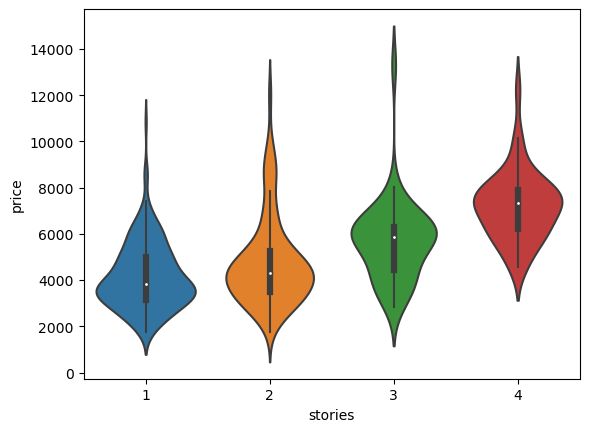

In [95]:
sns.violinplot(data=df, x="stories", y="price")
plt.show()

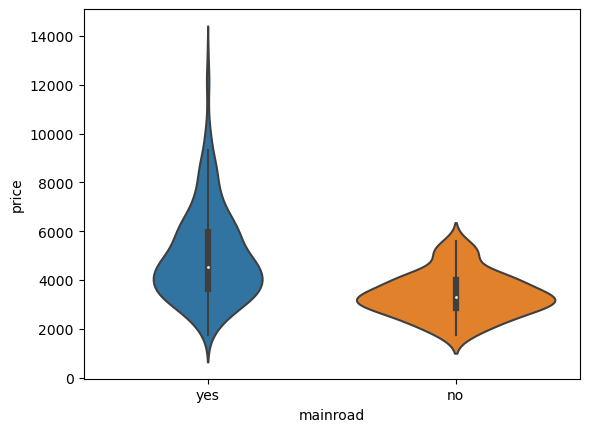

In [96]:
sns.violinplot(data=df, x="mainroad", y="price")
plt.show()

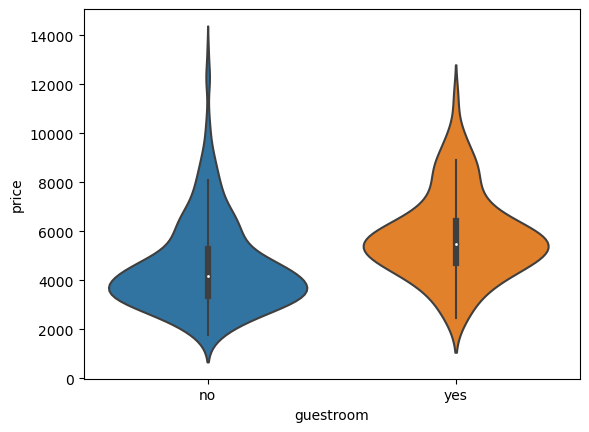

In [97]:
sns.violinplot(data=df, x="guestroom", y="price")
plt.show()

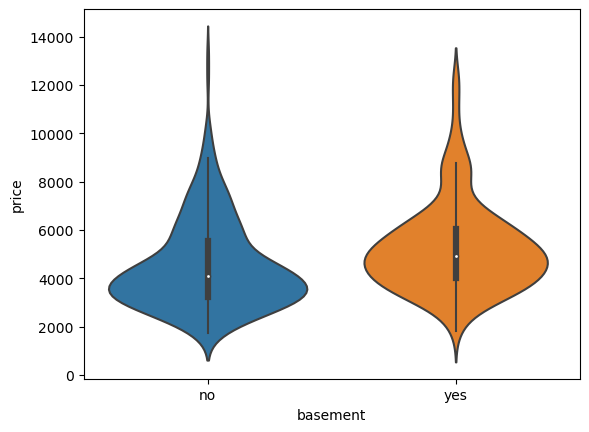

In [98]:
sns.violinplot(data=df, x="basement", y="price")
plt.show()

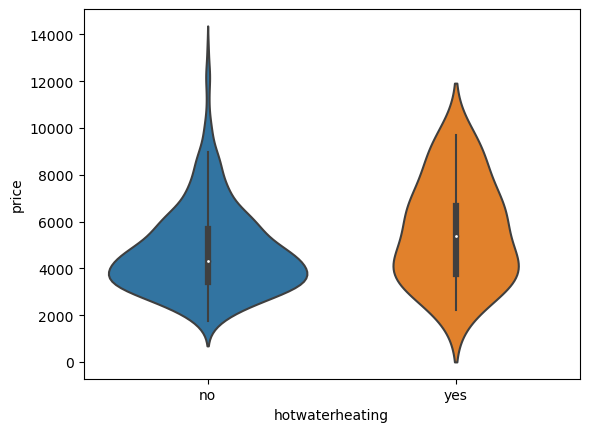

In [99]:
sns.violinplot(data=df, x="hotwaterheating", y="price")
plt.show()

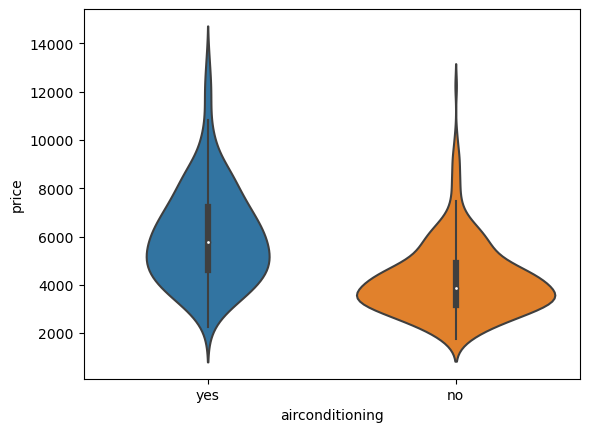

In [100]:
sns.violinplot(data=df, x="airconditioning", y="price")
plt.show()

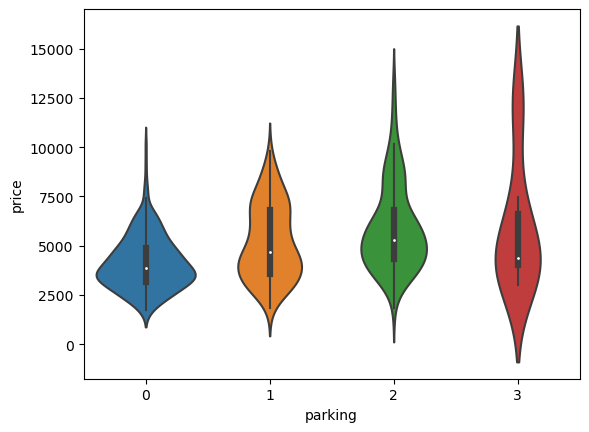

In [101]:
sns.violinplot(data=df, x="parking", y="price")
plt.show()

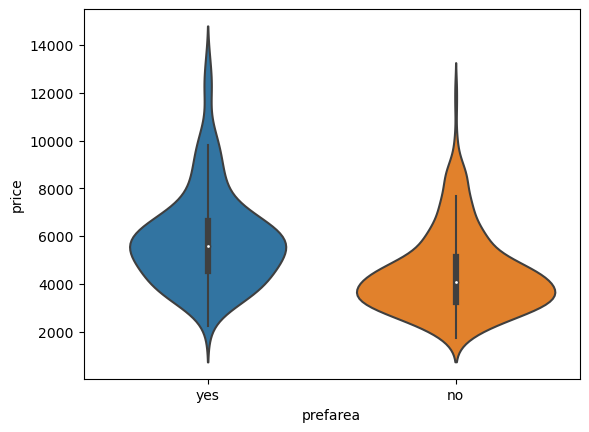

In [102]:
sns.violinplot(data=df, x="prefarea", y="price")
plt.show()

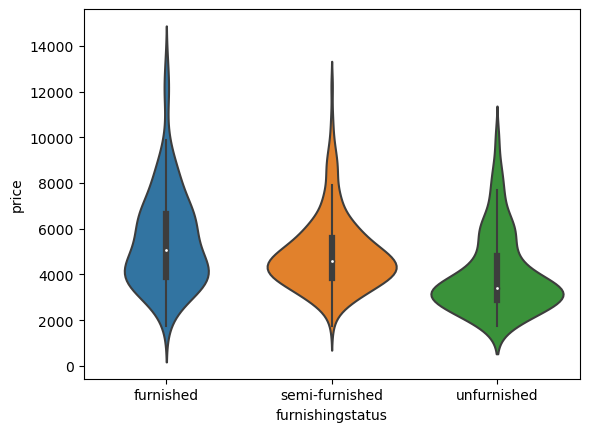

In [103]:
sns.violinplot(data=df, x="furnishingstatus", y="price")
plt.show()

# PREPROCESSİNG DATA

# Detecting And Removing Outliers

In [104]:
threshold = 2

mean = np.mean(df.price)
std = np.std(df.price)
z_scores = np.abs((df.price - mean) / std)
outliers = z_scores > threshold
print("Removed house prices:")
print(df[outliers].price)
df = df[~outliers]

Removed house prices:
0     13300
1     12250
2     12250
3     12215
4     11410
5     10850
6     10150
7     10150
8      9870
9      9800
10     9800
11     9681
12     9310
13     9240
14     9240
15     9100
16     9100
17     8960
18     8890
19     8855
20     8750
21     8680
22     8645
23     8645
24     8575
25     8540
Name: price, dtype: int64


## converting Yes-No To 1-0
for : mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea

In [105]:
df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] = \
    df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']] \
    .apply(lambda x: x.map({'yes': 1, 'no': 0}))


## Normalization
area- min max


In [106]:
df.area = ((df.area- df.area.min()) / (df.area.max()-df.area.min()))

## Getting Dummies Of Categorical Datas
bedrooms, bathrooms, stories, parking, furnishingstatus

In [107]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode], prefix=feature_to_encode)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = ['bedrooms', 'bathrooms', 'stories', 'parking']
for feature in features_to_encode:
    df = encode_and_bind(df, feature)

 write 'furnished' - 'unfurnished' instead of 'furnishingstatus_0'

In [108]:
dummies = pd.get_dummies(df['furnishingstatus']) 
df.drop("furnishingstatus", axis = 1, inplace = True)
df = pd.concat([df,dummies], axis =1)

In [109]:
df.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_1,bedrooms_2,...,stories_2,stories_3,stories_4,parking_0,parking_1,parking_2,parking_3,furnished,semi-furnished,unfurnished
26,8463,0.311828,1,1,1,0,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
27,8400,0.517921,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
28,8400,0.451613,1,0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
29,8400,0.275986,1,0,1,0,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
30,8400,0.417563,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 26 to 544
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            519 non-null    int64  
 1   area             519 non-null    float64
 2   mainroad         519 non-null    int64  
 3   guestroom        519 non-null    int64  
 4   basement         519 non-null    int64  
 5   hotwaterheating  519 non-null    int64  
 6   airconditioning  519 non-null    int64  
 7   prefarea         519 non-null    int64  
 8   bedrooms_1       519 non-null    uint8  
 9   bedrooms_2       519 non-null    uint8  
 10  bedrooms_3       519 non-null    uint8  
 11  bedrooms_4       519 non-null    uint8  
 12  bedrooms_5       519 non-null    uint8  
 13  bedrooms_6       519 non-null    uint8  
 14  bathrooms_1      519 non-null    uint8  
 15  bathrooms_2      519 non-null    uint8  
 16  bathrooms_3      519 non-null    uint8  
 17  stories_1      

# CREATİNG MODEL

In [111]:
# %pip install keras

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
#from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU

## Train Test Split

In [113]:
y = df.price
x= df.drop("price", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)

## Build Model

In [114]:
def build_model():
    model = Sequential()
    model.add(Dense(units = 24, kernel_initializer="uniform", activation="relu", input_dim =x_train.shape[1]))
    model.add(Dense(units = 12, kernel_initializer="uniform", activation="relu"))
    model.add(Dense(units = 1, kernel_initializer="uniform", activation="linear"))
    model.compile(optimizer="adam", loss="mean_squared_error", metrics= ["mae"])
    return model

## Model Training

In [115]:
import keras
import tensorflow
print(tensorflow.__version__)

2.15.0


https://stackoverflow.com/questions/77183749/module-error-for-from-keras-wrappers-scikit-learn-import-kerasclassifier

In [116]:
# pip install scikeras[tensorflow]    

In [117]:
#pip install scikeras[tensorflow-cpu]

In [118]:
# from tensorflow import keras
# from keras import wrappers
# from wrappers import scikit_learn
# from scikit_learn import KerasRegressor 
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from scikeras.wrappers import KerasClassifier

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [119]:
model = KerasRegressor(build_fn= build_model, epochs=100, verbose=2)

In [120]:
#%pip install --upgrade keras tensorflow

In [121]:
history = model.fit(x_train, y_train)

ModuleNotFoundError: No module named 'keras.src.engine.base_layer_v1'

In [ ]:
plt.plot(history.history['mae'])
plt.xlabel("Number of Epochs")
plt.ylabel("Mean absolute error")
plt.legend()
plt.show()

# MODEL EVALUATİON

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred)
x = np.array([1500, 9000])
y = np.array([1500, 9000])
sns.set(style="whitegrid")
sns.lineplot(x=x, y=y, color="red")
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.show()